In [1]:
%load_ext autoreload

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import mode
from skimage import io

from tkinter import *
import os
import shutil
import random

from typing import List

from easyimages import EasyImageList



In [3]:
os.chdir("..")

In [4]:
from src.EDA_utils import prepare_df
from src.EDA import get_leaf_folders
from src.EDA import create_EIL_from_directory
from src.EDA import plot_counts
from src.EDA import plot_img_size
from src.EDA import aspect_ratio_plot
from src.EDA import canny_edge_plot

## Setting up train test val folder

In [5]:
path = "raw_data"

In [6]:
df = prepare_df(path)

In [10]:
source_folder = 'raw_data'
destination_folder = 'data'
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [11]:
os.makedirs(os.path.join(destination_folder, 'train', 'bacteria'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'train', 'virus'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'train', 'normal'), exist_ok=True)

os.makedirs(os.path.join(destination_folder, 'val', 'bacteria'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'val', 'virus'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'val', 'normal'), exist_ok=True)

os.makedirs(os.path.join(destination_folder, 'test', 'bacteria'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'test', 'virus'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'test', 'normal'), exist_ok=True)

In [13]:
folders = ['bacteria', 'virus', 'normal']

for folder in folders:
    image_files = os.listdir(os.path.join(source_folder, folder))
    random.shuffle(image_files)
    
    train_count = int(train_ratio * len(image_files))
    val_count = int(val_ratio * len(image_files))
    
    train_files = image_files[:train_count]
    val_files = image_files[train_count:train_count + val_count]
    test_files = image_files[train_count + val_count:]
    
    for file in train_files:
        source_path = os.path.join(source_folder, folder, file)
        destination_path = os.path.join(destination_folder, 'train', folder, file)
        shutil.copy(source_path, destination_path)
    
    for file in val_files:
        source_path = os.path.join(source_folder, folder, file)
        destination_path = os.path.join(destination_folder, 'val', folder, file)
        shutil.copy(source_path, destination_path)
    
    for file in test_files:
        source_path = os.path.join(source_folder, folder, file)
        destination_path = os.path.join(destination_folder, 'test', folder, file)
        shutil.copy(source_path, destination_path)

## Preparing df

In [14]:
path = "data"

In [15]:
df = prepare_df(path)

In [16]:
df

,file_path,label,usage,size,aspect_ratio
0,data/test/virus/person886_virus_1536.jpeg,virus,test,"(1656, 1368)",1.210526
1,data/test/virus/person1197_virus_2039.jpeg,virus,test,"(1010, 562)",1.797153
2,data/test/virus/person149_virus_299.jpeg,virus,test,"(1528, 1032)",1.480620
3,data/test/virus/person1177_virus_2002.jpeg,virus,test,"(692, 383)",1.806789
4,data/test/virus/person124_virus_238.jpeg,virus,test,"(1336, 1256)",1.063694
...,...,...,...,...,...
5851,data/val/normal/NORMAL2-IM-1271-0001.jpeg,normal,val,"(2414, 1731)",1.394570
5852,data/val/normal/NORMAL2-IM-1123-0001.jpeg,normal,val,"(1384, 950)",1.456842
5853,data/val/normal/NORMAL2-IM-1160-0001.jpeg,normal,val,"(2091, 2326)",0.898968
5854,data/val/normal/IM-0323-0001.jpeg,normal,val,"(1824, 1430)",1.275524


In [17]:
l_folders = get_leaf_folders(path=path)
l_folders

['data/test/bacteria',
 'data/test/normal',
 'data/test/virus',
 'data/train/bacteria',
 'data/train/normal',
 'data/train/virus',
 'data/val/bacteria',
 'data/val/normal',
 'data/val/virus']

In [28]:
create_EIL_from_directory(subfolder=l_folders[2],sample=50,size=68)

In [20]:
create_EIL_from_directory(subfolder=l_folders[1],sample=50,size=68)

In [21]:
create_EIL_from_directory(subfolder=l_folders[2],sample=50,size=68)

In [17]:
%matplotlib inline

In [18]:
plt.style.use('seaborn-v0_8-muted')

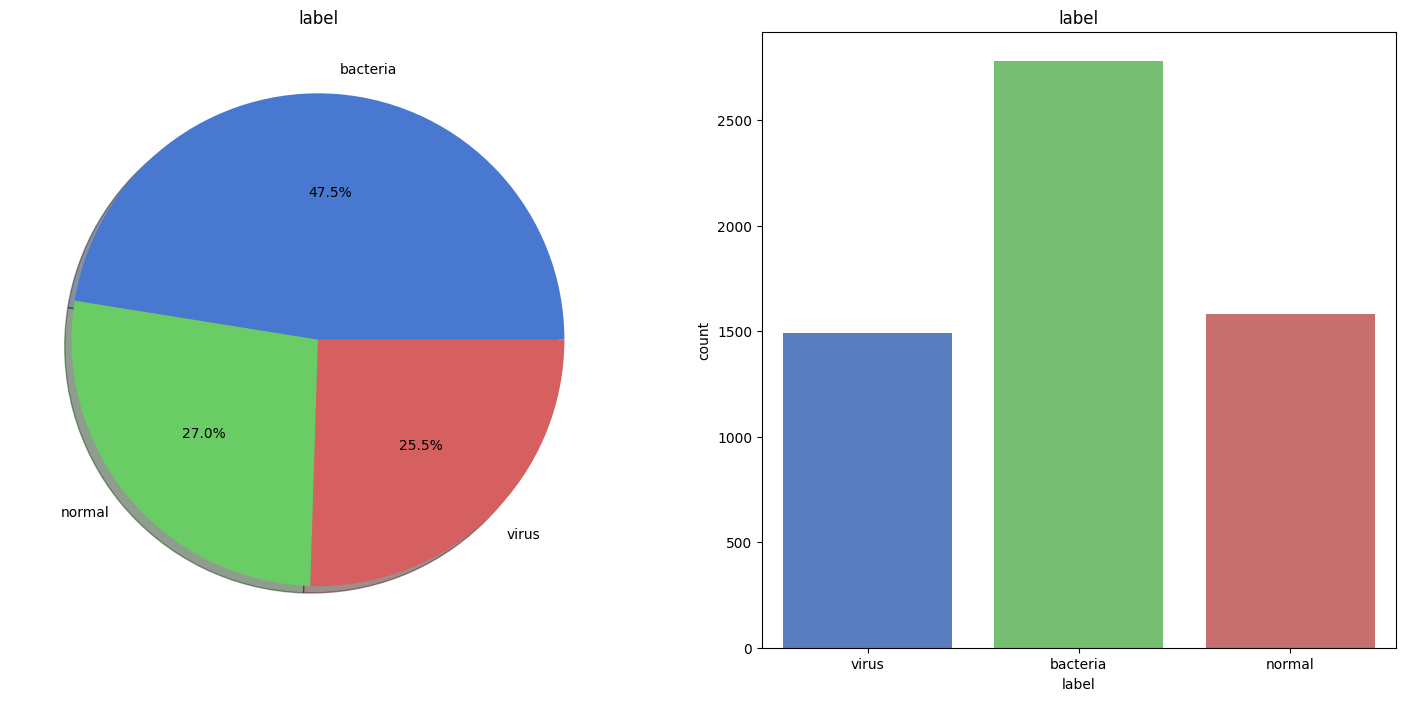

In [19]:
plot_counts(df,"label")

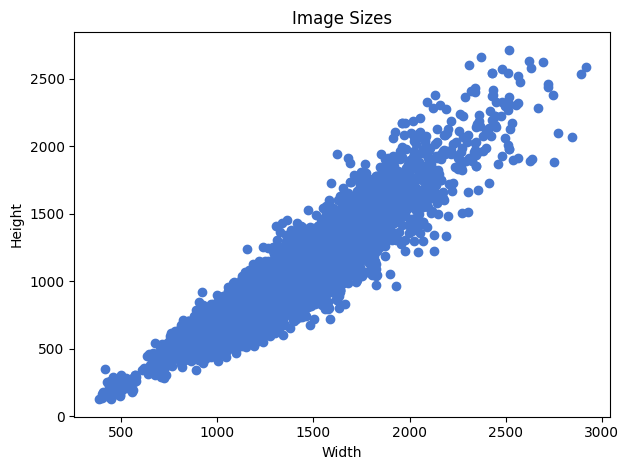

In [20]:
plot_img_size(df,"size")

In [21]:
df['aspect_ratio'].describe()

count    5856.000000
mean        1.442986
std         0.254356
min         0.835391
25%         1.261627
50%         1.415885
75%         1.585750
max         3.378788
Name: aspect_ratio, dtype: float64

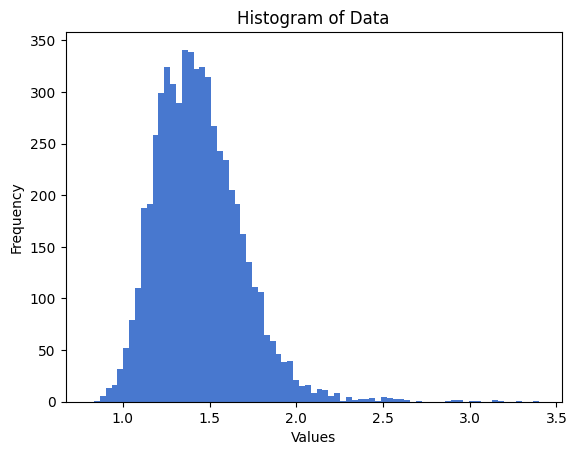

In [22]:
# Define the number of bins and range
num_bins = 77
range_min = 0.8
range_max = 3.4

aspect_ratio_plot(df,"aspect_ratio",num_bins,range_min,range_max)

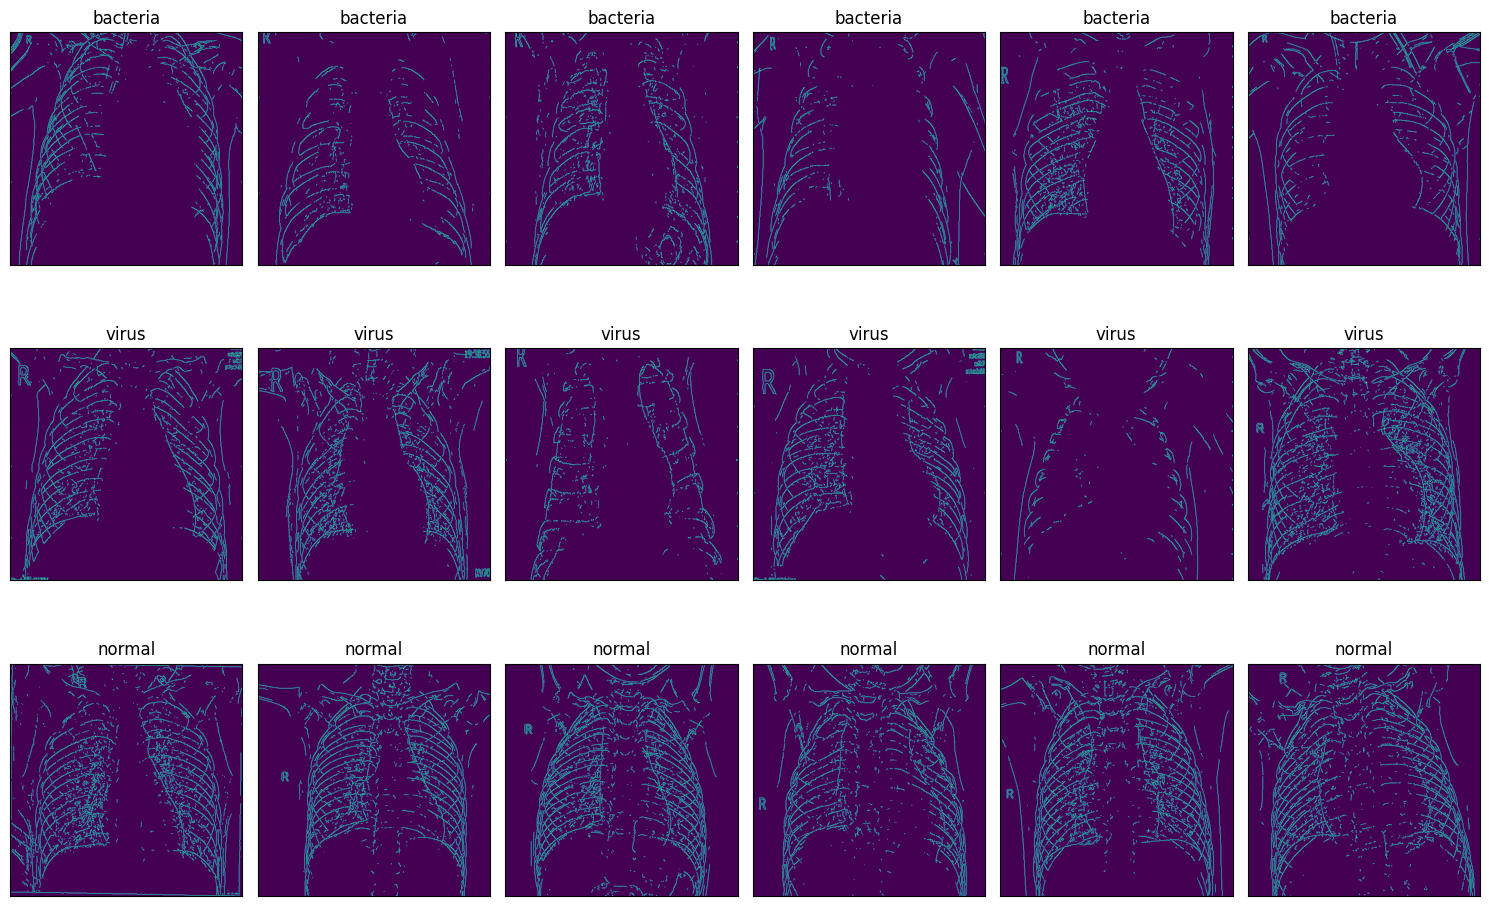

In [23]:
canny_edge_plot(df, ['bacteria', 'virus', 'normal'],'label', 'file_path')